In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt   #Data visualisation libraries 
import sklearn
from sklearn.model_selection import cross_val_score
# Sci-kit Learn Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
# Metrics
from sklearn.metrics import mean_squared_error
from pprint import pprint
import copy
from sklearn.model_selection import ParameterGrid

In [2]:
loan_df = pd.read_csv('D:\Academic\Data Science\lc_data/cleaned_data.csv')
loan_df.head(5)

,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,acc_now_delinq
0,0,5000.0,5000.0,4975.0,1,10.65,162.87,2,7,6,...,0.00,0.00,171.62,0.0,44.104838,1.0,1,109981.011585,18.310118,0.0
1,1,2500.0,2500.0,2500.0,2,15.27,59.83,3,14,6,...,117.08,1.11,119.66,0.0,44.104838,1.0,1,109981.011585,18.310118,0.0
2,2,2400.0,2400.0,2400.0,1,15.96,84.33,3,15,6,...,0.00,0.00,649.91,0.0,44.104838,1.0,1,109981.011585,18.310118,0.0
3,3,10000.0,10000.0,10000.0,1,13.49,339.31,3,11,6,...,0.00,0.00,357.48,0.0,44.104838,1.0,1,109981.011585,18.310118,0.0
4,4,3000.0,3000.0,3000.0,2,12.69,67.79,2,10,6,...,0.00,0.00,67.79,0.0,44.104838,1.0,1,109981.011585,18.310118,0.0


In [3]:
# Labels (y_true of this dataset)
y = loan_df.pop("int_rate")

In [4]:
train = int(len(loan_df) * 0.60)
val = int(len(loan_df) * 0.20)
test = int(len(loan_df) * 0.20)

In [5]:
def cross_validate(clf, df, test_x, test_y, k = 5) :
  # Build the metric dict.
  metric = {"train":{"mse": [], "score": []},
            "val" : {"mse": [], "score": []},
            "test" :{"mse": [], "score": []}};

  split = int(len(df) * 0.80)
  for i in range(k) :
    df = df.sample(frac=1)
    y = df["label"]
    x = df.loc[:, df.columns != 'label']
    train_x, train_y = x[:split],y[:split]
    val_x, val_y = x[split:], y[split:]
    model = copy.deepcopy(clf)
    model.fit(train_x, train_y)  
    # Log the Mean Square Error
    metric["train"]["mse"].append(mean_squared_error(train_y,model.predict(train_x)))
    metric["val"]["mse"].append(mean_squared_error(val_y,model.predict(val_x)))
    metric['test']["mse"].append(mean_squared_error(test_y,model.predict(test_x))) 
    # Log the Model Score
    metric["train"]["score"].append(model.score(train_x,train_y))
    metric["val"]["score"].append(model.score(val_x,val_y))
    metric["test"]["score"].append(model.score(test_x,test_y))    
  return metric
  

In [6]:
crossValidationSet = copy.deepcopy(loan_df[:train+val]);
crossValidationSet["label"] = y[:train+val];

In [7]:
def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [8]:
train_x,train_y = loan_df[:train], y[:train]
val_x, val_y = loan_df[train: train + val], y[train: train + val]
test_x, test_y = loan_df[train + test :], y[train + test :]

assert len(train_x) == train, "Training set length does not match expected train length"
assert len(val_x) == val, "Validation set length does not match expected validation length"
assert len(test_x) >= test , "Test set length does not match expected test length"

In [9]:
lr = LinearRegression() # Init
lr.fit(train_x, train_y) # Train

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Linear Regression Score and MSE

1. Score (0.0 to 1.0) 1.0 being the highest 
2. MSE (0.0 to 1.0) 0.0 being the best

In [10]:
print("********************MSE********************")
# MSE on training set
print("Training Set Score Linear Regression:", lr.score(train_x,train_y))

# MSE on validation set
print("Validation Set Score Linear Regression:", lr.score(val_x, val_y))

# MSE on test set
print("Test Set Score Linear Regression:", lr.score(test_x, test_y))

# MSE on training set
print("Training Set MSE Linear Regression:", mean_squared_error(train_y, lr.predict(train_x)))

# MSE on validation set
print("Validation Set MSE Linear Regression:", mean_squared_error(val_y, lr.predict(val_x)))

# MSE on test set
print("Test Set MSE Linear Regression:", mean_squared_error(test_y, lr.predict(test_x)))

print("********************MAPE********************")
# MSE on training set
print("Training Set Score Linear Regression:", lr.score(train_x,train_y))

# MSE on validation set
print("Validation Set Score Linear Regression:", lr.score(val_x, val_y))

# MAPE on test set
print("Test Set Score Linear Regression:", lr.score(test_x, test_y))

# MAPE on training set
print("Training Set MAPE Linear Regression:", mape(train_y, lr.predict(train_x)))

# MAPE on validation set
print("Validation Set MAPE Linear Regression:", mape(val_y, lr.predict(val_x)))

# MAPE on test set
print("Test Set MAPE Linear Regression:", mape(test_y, lr.predict(test_x)))

********************MSE********************
Training Set Score Linear Regression: 0.9602038090793331
Validation Set Score Linear Regression: 0.9837360795034014
Test Set Score Linear Regression: 0.9870914423635125
Training Set MSE Linear Regression: 0.7588524105425732
Validation Set MSE Linear Regression: 0.30090928582755705
Test Set MSE Linear Regression: 0.24695311566090825
********************MAPE********************
Training Set Score Linear Regression: 0.9602038090793331
Validation Set Score Linear Regression: 0.9837360795034014
Test Set Score Linear Regression: 0.9870914423635125
Training Set MAPE Linear Regression: 4.992220117102113
Validation Set MAPE Linear Regression: 4.130548073703696
Test Set MAPE Linear Regression: 3.564994794289469


# 5 Fold Cross Validation

In [11]:
lr_cv = LinearRegression()
cv_result = cross_validate(lr_cv, crossValidationSet, test_x, test_y)
pprint(cv_result)

{'test': {'mse': [0.1703232536035447,
                  0.17046367964964962,
                  0.1698525008477147,
                  0.17089360139719637,
                  0.1696515549208081],
          'score': [0.9910969840162116,
                    0.9910896437657961,
                    0.9911215908694796,
                    0.9910671712019553,
                    0.9911320945720644]},
 'train': {'mse': [0.6229001057001485,
                   0.6248217404436613,
                   0.6217433484529971,
                   0.6213665493867437,
                   0.6216241563930045],
           'score': [0.9675312202637517,
                     0.967413118630985,
                     0.9675353485811216,
                     0.9676290143161815,
                     0.9675639253669078]},
 'val': {'mse': [0.6149233401042999,
                 0.607021675144218,
                 0.6196077868265296,
                 0.6208411025167271,
                 0.6199542263075458],
         'score': 

In [12]:
lr_predictions = lr.predict(test_x)

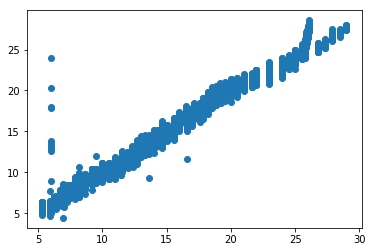

In [13]:
plt.scatter(test_y,lr_predictions)

# Grid Search for Hyperparameter Tuning

In [14]:
# Linear Regression Params
fit_intercept : bool
normalize : bool
params = {"fit_intercept":[True, False], "normalize" : [True, False]}
grid = list(ParameterGrid(params))
result = [] # This result will contain the results for 5 cross validations per param combination created by ParameterGrid
for param in grid :
  result.append(cross_validate(LinearRegression(param),crossValidationSet, test_x, test_y))
  

In [17]:
print("Result of" , grid[0] , "hyper parameters is")
pprint(result[0])

Result of {'fit_intercept': True, 'normalize': True} hyper parameters is
{'test': {'mse': [0.16976603557287787,
                  0.169870484422429,
                  0.16957069350598564,
                  0.1696824667083474,
                  0.17035813692729998],
          'score': [0.9911261105208345,
                    0.9911206508448516,
                    0.9911363213024339,
                    0.9911304787730897,
                    0.9910951606199201]},
 'train': {'mse': [0.6207052954608467,
                   0.6206053075693178,
                   0.6221273120106336,
                   0.620317683305411,
                   0.6226478731418098],
           'score': [0.9676178315860314,
                     0.9676005130245839,
                     0.967518964652869,
                     0.9676155750542946,
                     0.96753285509814]},
 'val': {'mse': [0.6235500804897371,
                 0.6238960043488867,
                 0.6178445433691611,
                 0.625


# Random Forest

In [18]:
rf = RandomForestRegressor() # Init
rf.fit(train_x, train_y) # Train

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

# Random Forest Regressor Score and MSE
1. Score (0.0 to 1.0) 1.0 being the highest 
2. MSE (0.0 to 1.0) 0.0 being the best

In [19]:
print("********************MSE********************")
# MSE on training set
print("Training Set Score Random Forest  :", rf.score(train_x,train_y))

# MSE on validation set
print("Validation Set Score Random Forest  :", rf.score(val_x, val_y))

# MSE on test set
print("Test Set Score Random Forest  :", rf.score(test_x, test_y))

# MSE on training set
print("Training Set MSE Random Forest :", mean_squared_error(train_y, rf.predict(train_x)))

# MSE on validation set
print("Validation Set MSE Random Forest :", mean_squared_error(val_y, rf.predict(val_x)))

# MSE on test set
print("Test Set MSE Random Forest :", mean_squared_error(test_y, rf.predict(test_x)))

print("********************MAPE********************")
# MAPE on training set
print("Training Set Score Random Forest  :", rf.score(train_x,train_y))

# MAPE on validation set
print("Validation Set Score Random Forest  :", rf.score(val_x, val_y))

# MAPE on test set
print("Test Set Score Random Forest  :", rf.score(test_x, test_y))

# MAPE on training set
print("Training Set MAPE Random Forest :", mape(train_y, rf.predict(train_x)))

# MAPE on validation set
print("Validation Set MAPE Random Forest :", mape(val_y, rf.predict(val_x)))

# MAPE on test set
print("Test Set MAPE Random Forest :", mape(test_y, rf.predict(test_x)))

********************MSE********************
Training Set Score Random Forest  : 0.9997448995077337
Validation Set Score Random Forest  : 0.9987821808041487
Test Set Score Random Forest  : 0.9937146954228547
Training Set MSE Random Forest : 0.00486437568542123
Validation Set MSE Random Forest : 0.022531658622368018
Test Set MSE Random Forest : 0.12024391817536677
********************MAPE********************
Training Set Score Random Forest  : 0.9997448995077337
Validation Set Score Random Forest  : 0.9987821808041487
Test Set Score Random Forest  : 0.9937146954228547
Training Set MAPE Random Forest : 0.02228875416641345
Validation Set MAPE Random Forest : 0.536806422933755
Test Set MAPE Random Forest : 1.7663092875014659


# 5 Fold Cross Validation

In [20]:
rf_cv_result = cross_validate(RandomForestRegressor(), crossValidationSet, test_x, test_y)
pprint(rf_cv_result)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

{'test': {'mse': [0.11144637842723308,
                  0.09936608587692877,
                  0.09639979851822487,
                  0.09443887881860664,
                  0.10274483964944656],
          'score': [0.9941745541640338,
                    0.9948060066250967,
                    0.99496105828838,
                    0.9950635580883735,
                    0.9946293948107637]},
 'train': {'mse': [0.004044248516238206,
                   0.003672450847913595,
                   0.004131874102608316,
                   0.0036664825283974477,
                   0.00387870753309919],
           'score': [0.999788820950977,
                     0.9998085343996217,
                     0.9997841775894207,
                     0.9998085181741808,
                     0.9997977549429916]},
 'val': {'mse': [0.02112238334074786,
                 0.029430976849076532,
                 0.02059362601899399,
                 0.023983425323121785,
                 0.024260080270859633]

In [21]:
rf_predictions = rf.predict(test_x)

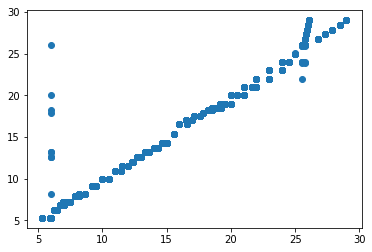

In [22]:
plt.scatter(test_y,rf_predictions)

# Grid Search for Hyperparameter Tuning

In [23]:
# Random Forest Regression Params
# n_estimators : [1, 10, 50, 100] This can be any value, but choosing these three for faster computation.
# max_depth : [1, 10, 20]  This can be any value, but choosing these three for faster computation.
# More params here : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
params = {"n_estimators" : [1, 10, 100], "max_depth" : [1, 10, 20]}
grid = list(ParameterGrid(params))
result = [] # This result will contain the results for 5 cross validations per param combination created by ParameterGrid
for param in grid :
  print(param)
#   result.append(cross_validate(RandomForestRegressor(*param),crossValidationSet, test_x, test_y))

{'max_depth': 1, 'n_estimators': 1}
{'max_depth': 1, 'n_estimators': 10}
{'max_depth': 1, 'n_estimators': 100}
{'max_depth': 10, 'n_estimators': 1}
{'max_depth': 10, 'n_estimators': 10}
{'max_depth': 10, 'n_estimators': 100}
{'max_depth': 20, 'n_estimators': 1}
{'max_depth': 20, 'n_estimators': 10}
{'max_depth': 20, 'n_estimators': 100}


# Neural Net - Multi Layer Perceptron

In [24]:
nn = MLPRegressor() # Init
# nn = MLPRegressor(hidden_layer_sizes=(10,),  activation='relu', solver='lbfgs',alpha=0.001,batch_size='auto',
#               learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True,
#               random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9,
#               nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
#               epsilon=1e-08)
nn.fit(train_x, train_y) # Train

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

# Multi Layer Perceptron Score and MSE. 
1. Score (0.0 to 1.0) 1.0 being the highest 
2. MSE (0.0 to 1.0) 0.0 being the best

In [25]:
print("********************MSE********************")
# MSE on training set
print("Training Set Score Multi Layer Perceptron :", nn.score(train_x, train_y))

# MSE on validation set
print("Validation Set Score Multi Layer Perceptron :", nn.score(val_x, val_y))

# MSE on test set
print("Test Set Score Multi Layer Perceptron :", nn.score(test_x, test_y))

# MSE on training set
print("Training Set MSE Multi Layer Perceptron :", mean_squared_error(train_y, nn.predict(train_x)))

# MSE on validation set
print("Validation Set MSE Multi Layer Perceptron :", mean_squared_error(val_y, nn.predict(val_x)))

# MSE on test set
print("Test Set MSE Multi Layer Perceptron :", mean_squared_error(test_y, nn.predict(test_x)))

print("********************MAPE********************")
# MSE on training set
print("Training Set Score Multi Layer Perceptron :", nn.score(train_x, train_y))

# MSE on validation set
print("Validation Set Score Multi Layer Perceptron :", nn.score(val_x, val_y))

# MSE on test set
print("Test Set Score Multi Layer Perceptron :", nn.score(test_x, test_y))

# MSE on training set
print("Training Set MAPE Multi Layer Perceptron :", mape(train_y, nn.predict(train_x)))

# MSE on validation set
print("Validation Set MAPE Multi Layer Perceptron :", mape(val_y, nn.predict(val_x)))

# MSE on test set
print("Test Set MAPE Multi Layer Perceptron :", mape(test_y, nn.predict(test_x)))

********************MSE********************
Training Set Score Multi Layer Perceptron : -8.553775603381554e-07
Validation Set Score Multi Layer Perceptron : -0.0686280491004474
Test Set Score Multi Layer Perceptron : -0.0342429294826081
Training Set MSE Multi Layer Perceptron : 19.068484749222915
Validation Set MSE Multi Layer Perceptron : 19.771376965188686
Test Set MSE Multi Layer Perceptron : 19.786061384894957
********************MAPE********************
Training Set Score Multi Layer Perceptron : -8.553775603381554e-07
Validation Set Score Multi Layer Perceptron : -0.0686280491004474
Test Set Score Multi Layer Perceptron : -0.0342429294826081
Training Set MAPE Multi Layer Perceptron : 30.269689957144386
Validation Set MAPE Multi Layer Perceptron : 36.84744143872189
Test Set MAPE Multi Layer Perceptron : 34.83580991482615


In [26]:
nn_predictions = nn.predict(test_x)

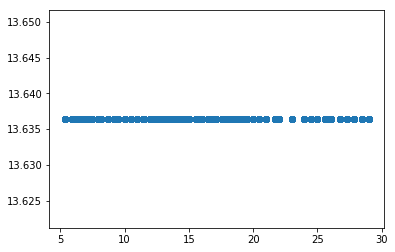

In [27]:
plt.scatter(test_y,nn_predictions)